Аналитическая задача -- составить портрет клиента, склонного откликнуться на предложение о новой карте.

## Описание данных

|Комментарий| Признак|
|--:|:--|
|Ипотечный кредит | mortgage|
|Страхование жизни | life_ins|
|Кредитная карта | cre_card|
|Дебетовая карта | deb_card|
|Мобильный банк | mob_bank|
|Текущий счет | curr_acc|
|Интернет-доступ к счету | internet|
|Индивидуальный заем | perloan|
|Наличие сбережений | savings|
|Пользование банкоматом за последнюю неделю | atm_user|
|Пользование услугами онлайн-маркетплейса за последний месяц | markpl|
|Возраст | age |
|Давность клиентской истории | cus_leng |
|Отклик на предложение новой карты | response |

Примечание: 1 -- наличие продукта/услуги/отклика; 0 -- отсутствие продукта/услуги/отклика.  

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Исследовательский анализ данных
- в разрезе значений целевого признака (`response` -- Отклик на предложение новой карты	) исследовать распределения признаков;
- исследовать возможные зависимости целевого признака от объясняющих признаков;
- в разрезе целевого признака составить портреты клиентов платежной системы;

Шаг 4. Составить и проверить гипотезы о наличие/отсутствии различий по признакам портрета клиента.

Шаг 5. Построить классификационные модели (дополнительное задание).


## Библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import shap
import xgboost

# 1. Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Аналитик Данных/Итоговая работа/project_7/vrk_response_bank.csv', sep=';')
#df = pd.read_csv('vrk_response_bank.csv', sep=';')
df.shape

(30259, 14)

In [ ]:
df.head(5)

,mortgage,life_ins,cre_card,deb_card,mob_bank,curr_acc,internet,perloan,savings,atm_user,markpl,age,cus_leng,response
0,0,0,0,0,0,0,0,0,0,0,0,18,1,0
1,1,1,0,1,1,0,0,0,0,1,0,18,2,1
2,1,1,0,1,0,0,0,0,0,0,1,18,2,1
3,1,1,1,1,0,1,0,0,0,1,1,18,2,1
4,1,1,0,1,0,0,0,1,0,1,0,18,2,0


In [ ]:
# Сразу посмотрим значения целевой переменной
df['response'].value_counts()

,count
response,
0,17170
1,13089


# 2. Первичная обработка данных

## Коррекция заголовков

In [ ]:
# приводим заголовки к нижнему регистру
df.columns = df.columns.str.lower()

In [ ]:
# переименуем признаки

df = df.rename(columns={
        'mortgage':'Ипотечный_кредит' ,
        'life_ins':'Страхование_жизни',
        'cre_card':'Кредитная_карта',
        'deb_card':'Дебетовая_карта',
        'mob_bank':'Мобильный_банк',
        'curr_acc':'Текущий_счет',
        'internet':'Интернет_доступ',
        'perloan':'Индивидуальный_заем',
        'savings':'Наличие_сбережений',
        'atm_user':'Пользование_банкоматом_последнюю_неделю',
        'markpl':'Пользование_маркетплейса_последний_месяц',
        'age':'Возраст',
        'cus_leng':'Давность_клиентской_истории'
        #'response':'отклик'
        })

In [ ]:
# приводим заголовки к нижнему регистру
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['ипотечный_кредит', 'страхование_жизни', 'кредитная_карта',
       'дебетовая_карта', 'мобильный_банк', 'текущий_счет', 'интернет_доступ',
       'индивидуальный_заем', 'наличие_сбережений',
       'пользование_банкоматом_последнюю_неделю',
       'пользование_маркетплейса_последний_месяц', 'возраст',
       'давность_клиентской_истории', 'response'],
      dtype='object')

## Типы признаков

In [ ]:
df.dtypes

,0
ипотечный_кредит,int64
страхование_жизни,int64
кредитная_карта,int64
дебетовая_карта,int64
мобильный_банк,int64
текущий_счет,int64
интернет_доступ,int64
индивидуальный_заем,int64
наличие_сбережений,int64
пользование_банкоматом_последнюю_неделю,int64


In [ ]:
# просмотр количества значений в признаках
for i in df.columns:
    print(df[i].value_counts())

ипотечный_кредит
1    22425
0     7834
Name: count, dtype: int64
страхование_жизни
1    27396
0     2863
Name: count, dtype: int64
кредитная_карта
1    20575
0     9684
Name: count, dtype: int64
дебетовая_карта
1    18711
0    11548
Name: count, dtype: int64
мобильный_банк
0    26565
1     3694
Name: count, dtype: int64
текущий_счет
1    24403
0     5856
Name: count, dtype: int64
интернет_доступ
0    23890
1     6369
Name: count, dtype: int64
индивидуальный_заем
0    25825
1     4434
Name: count, dtype: int64
наличие_сбережений
0    21527
1     8732
Name: count, dtype: int64
пользование_банкоматом_последнюю_неделю
1    18345
0    11914
Name: count, dtype: int64
пользование_маркетплейса_последний_месяц
1    20811
0     9448
Name: count, dtype: int64
возраст
45    884
28    884
30    882
41    872
34    862
33    861
52    860
51    859
48    859
50    852
32    848
39    846
35    841
31    841
36    840
46    837
49    831
43    830
42    830
40    830
54    819
44    812
47    810
29 

In [ ]:
# Учитывая что все признаки числовые произведем условное разделение признаков по количеству значений в признаке
numerical = [col for col in df.columns if len(df[col].value_counts()) > 5]
categorical = [col for col in df.columns if len(df[col].value_counts()) <= 5]
print(numerical)
print(categorical)

['возраст']
['ипотечный_кредит', 'страхование_жизни', 'кредитная_карта', 'дебетовая_карта', 'мобильный_банк', 'текущий_счет', 'интернет_доступ', 'индивидуальный_заем', 'наличие_сбережений', 'пользование_банкоматом_последнюю_неделю', 'пользование_маркетплейса_последний_месяц', 'давность_клиентской_истории', 'response']


## Проверка и обработка дубликатов

In [ ]:
# Выводим количество дубликатов в DataFrame df
duplicate_count = df.duplicated().sum()
print('Количество дубликатов в df:', duplicate_count)

Количество дубликатов в df: 16223


In [ ]:
# Выводим дублирующиеся строки
duplicates = df[df.duplicated()]
print('Дублирующиеся строки:\n', duplicates)

Дублирующиеся строки:
        ипотечный_кредит  страхование_жизни  кредитная_карта  дебетовая_карта  \
10                    1                  1                0                1   
19                    1                  1                0                1   
25                    1                  1                0                0   
29                    1                  1                0                1   
31                    1                  1                0                1   
...                 ...                ...              ...              ...   
30252                 1                  1                1                1   
30254                 1                  1                1                1   
30256                 1                  1                1                1   
30257                 1                  1                1                0   
30258                 1                  1                1                0   

       мобильный

In [ ]:
# Удалим дубликаты, просмотрим изменения целевой переменной
print('до удаления дублей', df.shape)
print(df['response'].value_counts())
df.drop_duplicates(inplace=True)
print('после удаления дублей', df.shape)
print(df['response'].value_counts())

до удаления дублей (30259, 14)
response
0    17170
1    13089
Name: count, dtype: int64
после удаления дублей (14036, 14)
response
1    7953
0    6083
Name: count, dtype: int64


## Проверка и обработка аномалий

In [ ]:
# Расчет квантилей
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

In [ ]:
# Просмотр выбросов

for i in numerical:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(df[i] < bounds[0])
    out_r = sum(df[i] > bounds[1])
    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', out_l, out_r)
    #plt.boxplot(df[i])
    #plt.show()
    print('=======+++++++=======')

------- возраст -------
Размах (9.0, 73.0)
Количество выбросов 0 0
=======+++++++=======


In [ ]:
# посмотрим строки с выбросами в mob_bank
bounds = calculate_iqr_boundaries(df['response'])
df[(df['response'] <= bounds[0]) | (df['response'] >= bounds[1])]

,ипотечный_кредит,страхование_жизни,кредитная_карта,дебетовая_карта,мобильный_банк,текущий_счет,интернет_доступ,индивидуальный_заем,наличие_сбережений,пользование_банкоматом_последнюю_неделю,пользование_маркетплейса_последний_месяц,возраст,давность_клиентской_истории,response


In [ ]:
# Заменим значения выбросов граничными значениями квантильного размаха
numeric = df.drop(['response'], axis=1).columns

for i in numerical:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(df[i] < bounds[0])
    out_r = sum(df[i] > bounds[1])
    # Заменяем выбросы на границы квантильного размаха
    df.loc[df[i] < bounds[0], i] = bounds[0]
    df.loc[df[i] > bounds[1], i] = bounds[1]

    # Произведем повторный расчет выбросов
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(df[i] < bounds[0])
    out_r = sum(df[i] > bounds[1])
    # Заменяем выбросы на границы квантильного размаха
    df.loc[df[i] < bounds[0], i] = bounds[0]
    df.loc[df[i] > bounds[1], i] = bounds[1]

    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', out_l, out_r)
    #plt.boxplot(df[i])
    #plt.show()
    print('=======+++++++=======')

------- возраст -------
Размах (9.0, 73.0)
Количество выбросов 0 0
=======+++++++=======


## Проверка и обработка пропущенных значений

In [ ]:
# посмотрим пропуски больше 3-х в строке
df_miss_row = df[df.isna().sum(axis=1) >= 3]
df_miss_row.shape

(0, 14)

In [ ]:
# Количество пропусков
def missings(df):
    missing_values = df.isna().sum()
    # Получаем процент пропусков
    missing_percentage = (missing_values / df.shape[0]) * 100
    # Объединяем в один DataFrame
    missing_info = pd.DataFrame({
        'Количество пропусков': missing_values,
        'Процент пропусков': missing_percentage
        })
    # Создаем переменную с пропусками
    missing_info = missing_info[missing_info['Количество пропусков'] > 0]

    return missing_info

missings(df)

,Количество пропусков,Процент пропусков


In [ ]:
print(df.isnull().sum())

ипотечный_кредит                            0
страхование_жизни                           0
кредитная_карта                             0
дебетовая_карта                             0
мобильный_банк                              0
текущий_счет                                0
интернет_доступ                             0
индивидуальный_заем                         0
наличие_сбережений                          0
пользование_банкоматом_последнюю_неделю     0
пользование_маркетплейса_последний_месяц    0
возраст                                     0
давность_клиентской_истории                 0
response                                    0
dtype: int64


# 3. Исследовательский анализ данных.

## Исследование распределения признаков в разрезе значений целевого признака (`response` -- Отклик на предложение новой карты)

In [ ]:
# Посмотрим оценки выборочных средних и медиан для каждого признака в разрезе целевого признака
cols = numerical

grouped = df.groupby('response')

for col in cols:
    mean_resp = grouped[col].mean()
    median_resp = grouped[col].median()
    print(f'For {col}:')
    print('Среднее:', mean_resp)
    print('Медиана:', median_resp)

For возраст:
Среднее: response
0    44.224560
1    38.355212
Name: возраст, dtype: float64
Медиана: response
0    45.0
1    38.0
Name: возраст, dtype: float64


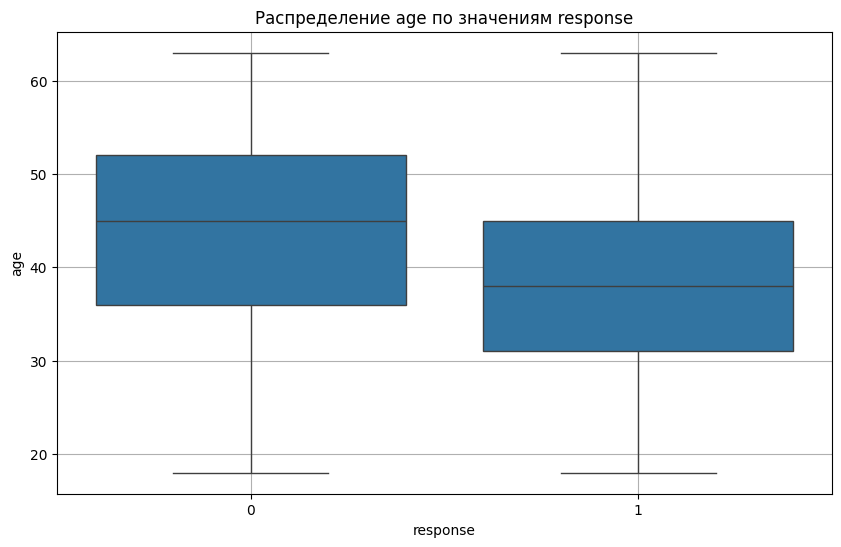

In [ ]:
# Создаем графики распределения для каждого числового признака по значениям response
for feature in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='response', y=feature, data=df)
    plt.title(f'Распределение {feature} по значениям response')
    plt.xlabel('response')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

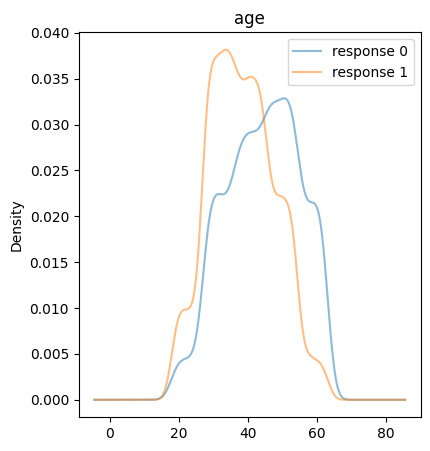

In [ ]:
# гистограммы и функции плотности для каждого признака в разрезе целевого признака
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical, 1):
    plt.subplot(1, 3, i)
    for response, data in df.groupby('response'):
        data[col].plot(kind='kde', label=f'response {response}', alpha=0.5)
    plt.title(col)
    plt.legend()

plt.show()

In [ ]:
column = df.drop(['response'], axis=1).columns
len(column)

13

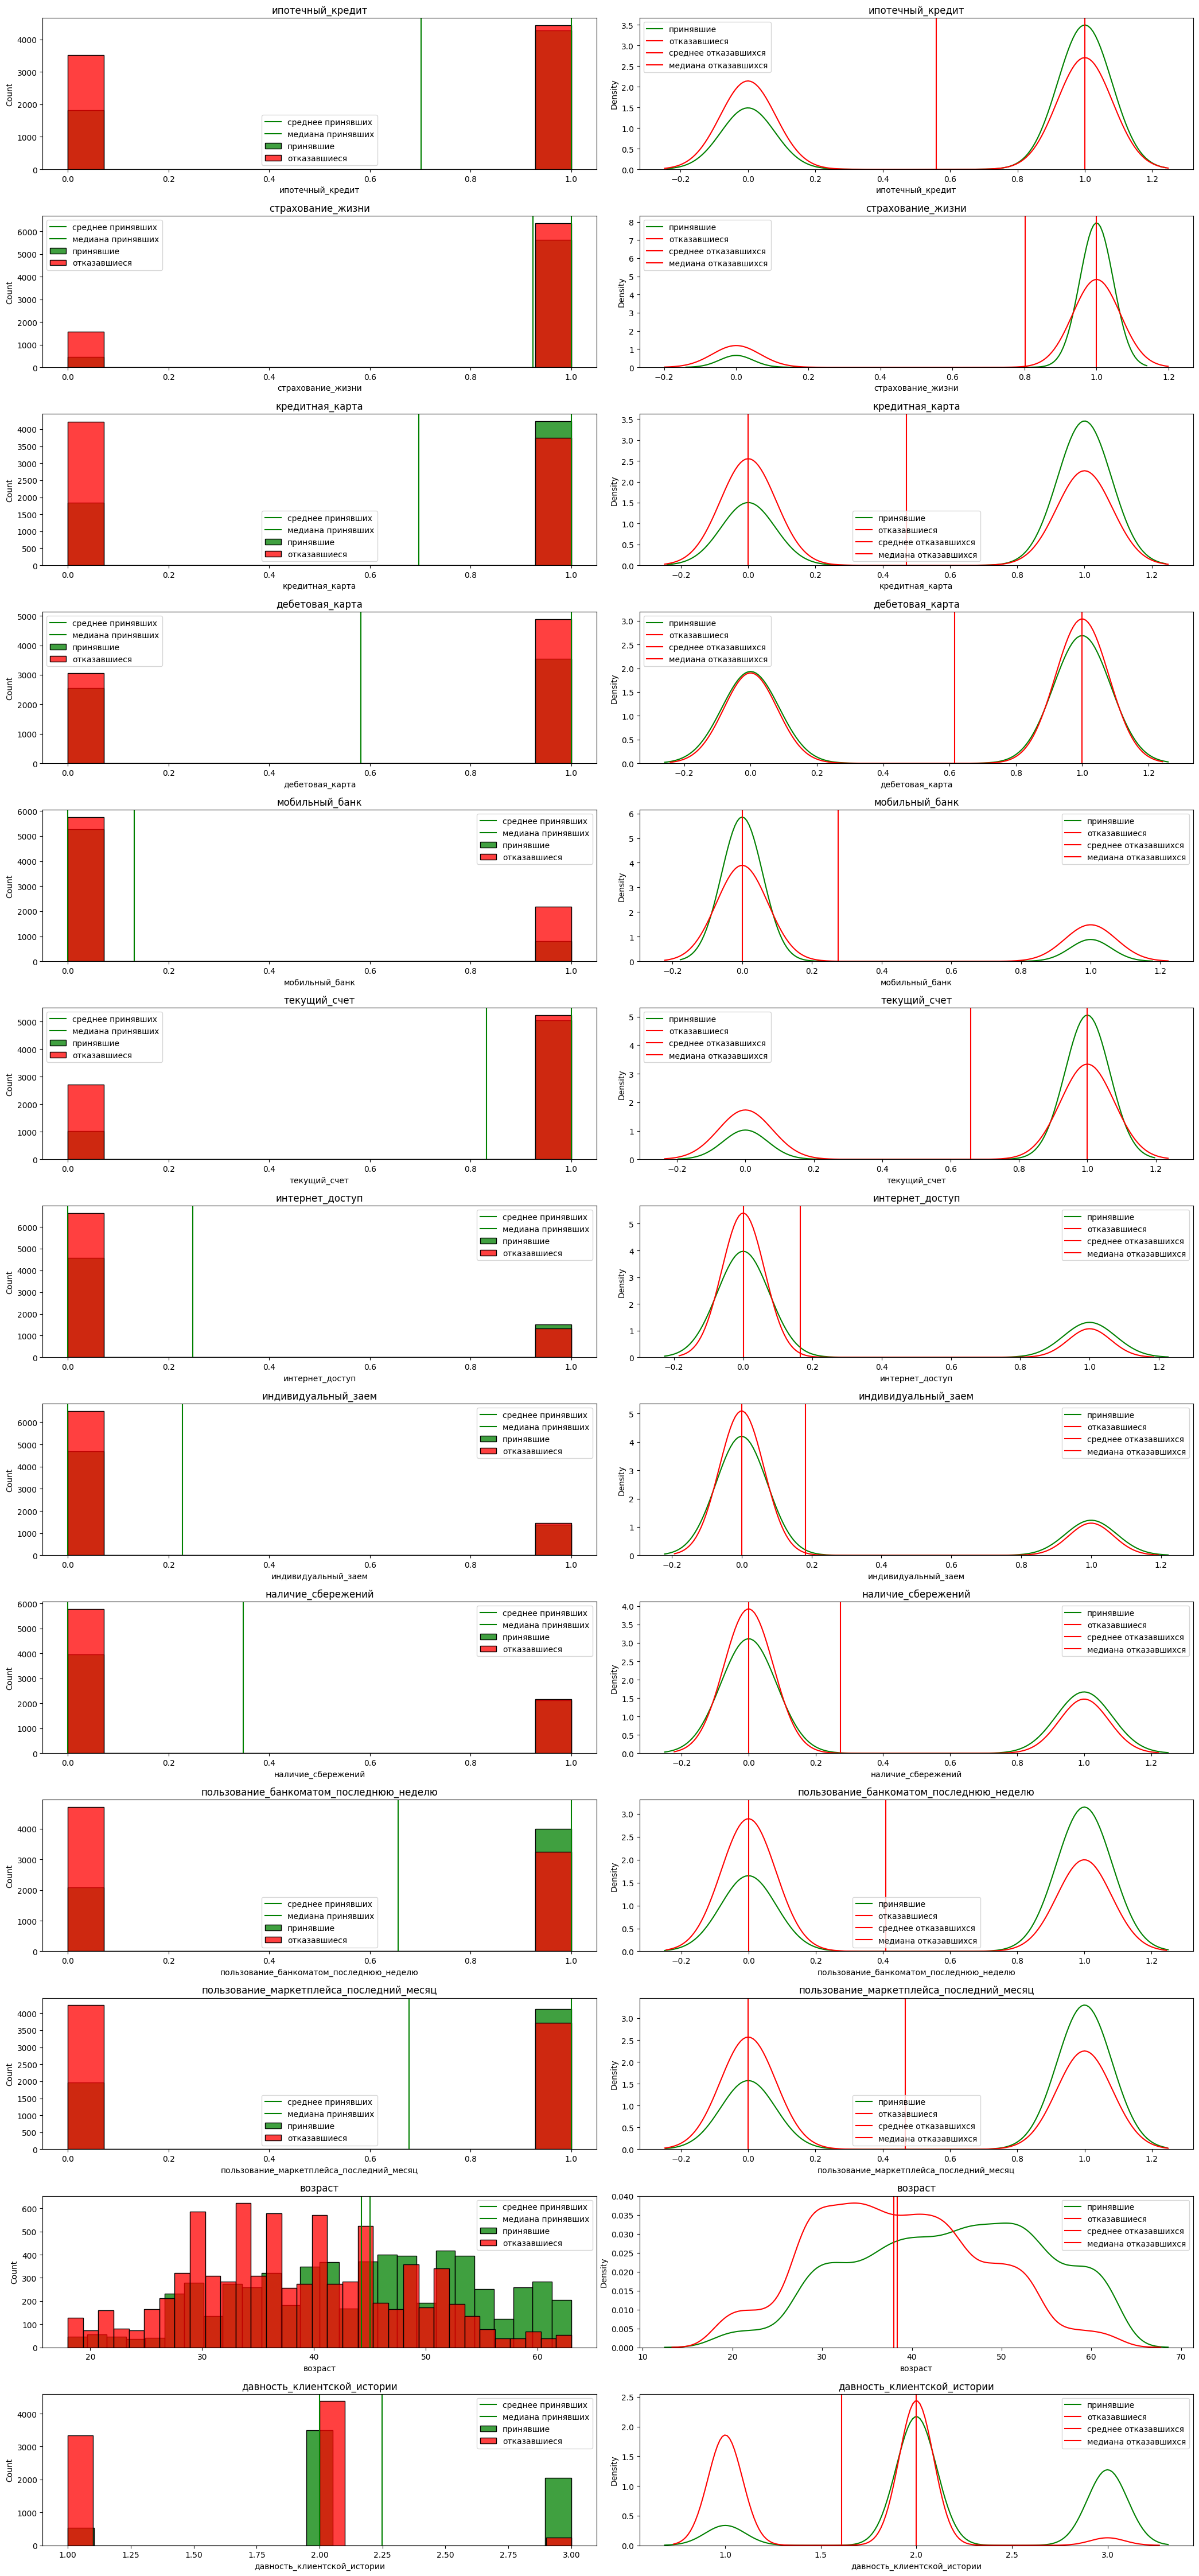

In [ ]:
# Построим графики для всех признаков
fig, ax = plt.subplots(13, 2, figsize=(21, 45))  # Увеличил высоту

for i, y in enumerate(column):
    plt.subplot(13, 2, 2*i+1)
    mean_0 = df[df.response == 0][y].mean()
    median_0 = df[df.response == 0][y].median()

    ax = sns.histplot(data=df[df.response == 0],
                      x=y,
                      color='green',
                      label='принявшие')
    ax = sns.histplot(data=df[df.response == 1],
                      x=y,
                      color='red',
                      label='отказавшиеся')
    ax.axvline(mean_0, color='green', label='среднее принявших')
    ax.axvline(median_0, color='green', label='медиана принявших')
    plt.title(y, fontsize=12)  # Добавил заголовок для графика
    plt.legend()

    plt.subplot(13, 2, 2*i+2)
    mean_1 = df[df.response == 1][y].mean()
    median_1 = df[df.response == 1][y].median()

    ax = sns.kdeplot(data=df[df.response == 0],
                      x=y,
                      color='green',
                      label='принявшие')
    ax = sns.kdeplot(data=df[df.response == 1],
                      x=y,
                      color='red',
                      label='отказавшиеся')

    ax.axvline(mean_1, color='red', label='среднее отказавшихся')
    ax.axvline(median_1, color='red', label='медиана отказавшихся')

    plt.title(y, fontsize=12)  # Добавил заголовок для графика
    plt.legend()

plt.tight_layout()  # Убирает перекрытие подзаголовков и графиков
plt.show()

## Исследования возможных зависимостей целевого признака от объясняющих признаков

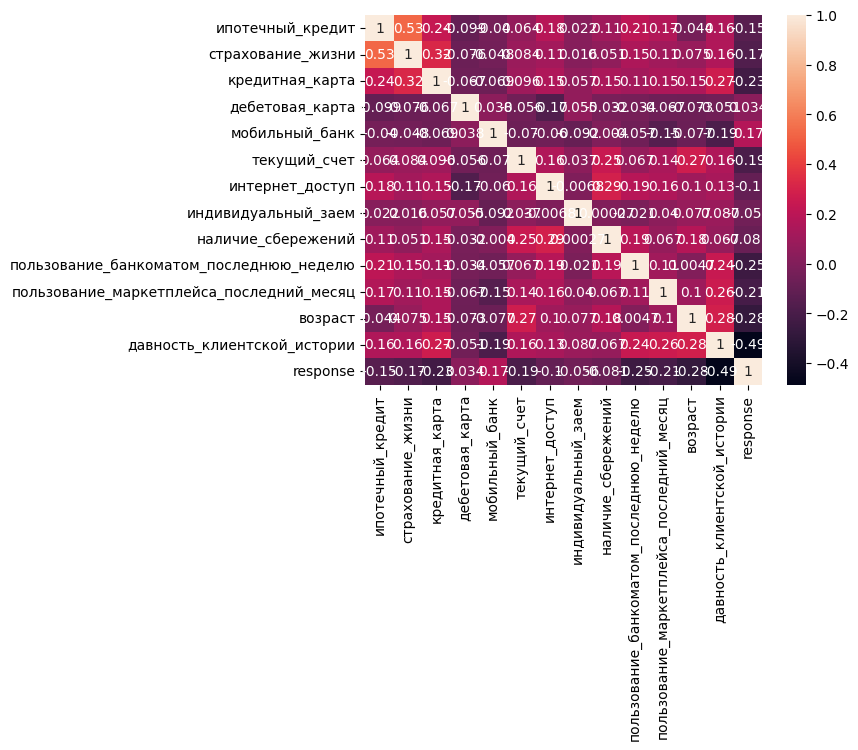

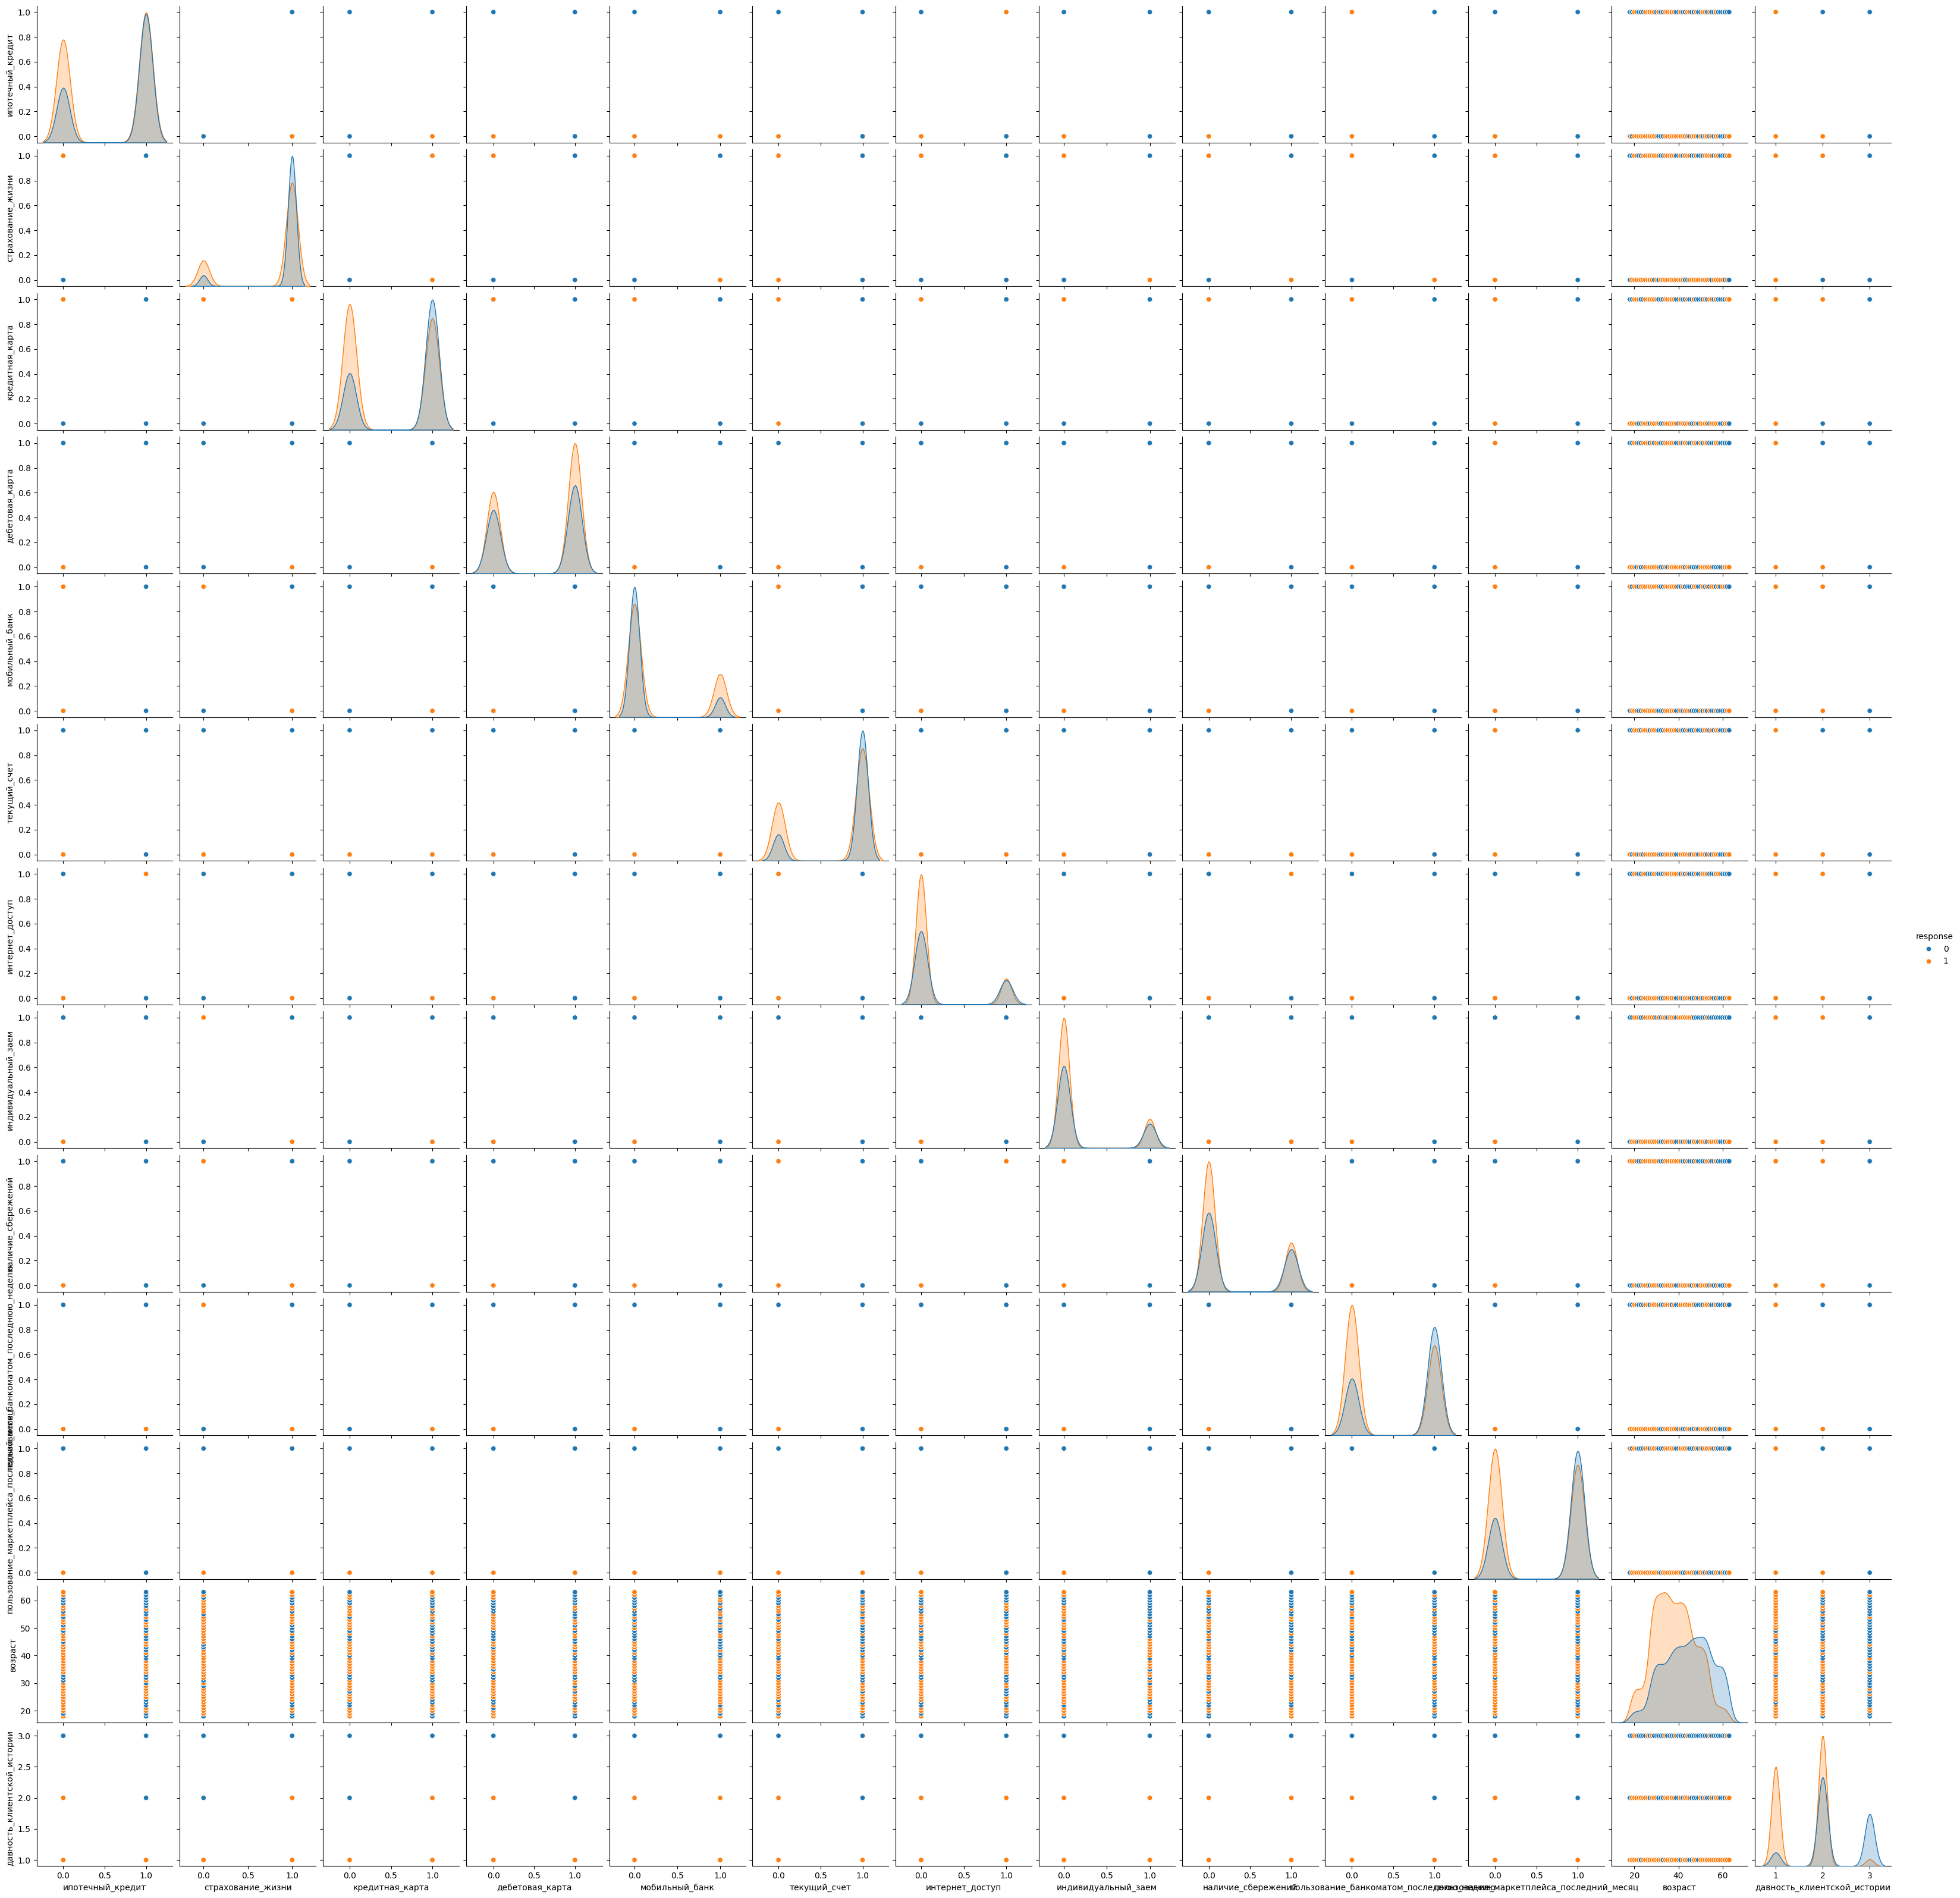

In [ ]:
# Построим матрицу корреляций
corr = df.corr()
sns.heatmap(corr, annot=True)

# Анализ распределения числовых признаков
sns.pairplot(df, hue='response')

## Составление портретов клиентов платежной системы в разрезе целевого признака

In [ ]:
# Портрет клиентов с response = 0
df_response_0 = df[df['response'] == 0]
mean_values_response_0 = df_response_0.mean()

# Портрет клиентов с response = 1
df_response_1 = df[df['response'] == 1]
mean_values_response_1 = df_response_1.mean()

# Сравнение портретов
print("Портрет клиентов с response = 0:")
print(mean_values_response_0)

print("Портрет клиентов с response = 1:")
print(mean_values_response_1)

Портрет клиентов с response = 0:
ипотечный_кредит                             0.701463
страхование_жизни                            0.923886
кредитная_карта                              0.697024
дебетовая_карта                              0.581785
мобильный_банк                               0.131514
текущий_счет                                 0.831333
интернет_доступ                              0.247904
индивидуальный_заем                          0.227684
наличие_сбережений                           0.348841
пользование_банкоматом_последнюю_неделю      0.656091
пользование_маркетплейса_последний_месяц     0.677297
возраст                                     44.224560
давность_клиентской_истории                  2.248233
response                                     0.000000
dtype: float64
Портрет клиентов с response = 1:
ипотечный_кредит                             0.558280
страхование_жизни                            0.801584
кредитная_карта                              0.470011
д

# 4. Составление и проверка гипотезы о наличие/отсутствии различий по признакам портрета клиента.

H0 - статистически значимых различий между клиентами принявшим и отказавшимися принять предложение банка нет.

H1 - статистически значимые различия между клиентами принявшим и отказавшимися принять предложение банка есть.

alpha = 0.05

In [ ]:
# проверка нормальности распределений признаков

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()


for feature in numeric_features:
    stat, p = stats.shapiro(df[feature])
    alpha = 0.05
    if p > alpha:
        print(f'Признак: {feature} имеет нормальное распределение (p-value={p})')
    else:
        print(f'Признак: {feature} не имеет нормального распределения (p-value={p})')

Признак: ипотечный_кредит не имеет нормального распределения (p-value=5.47851858848519e-100)
Признак: страхование_жизни не имеет нормального распределения (p-value=1.7079986223296166e-110)
Признак: кредитная_карта не имеет нормального распределения (p-value=4.983166583631729e-99)
Признак: дебетовая_карта не имеет нормального распределения (p-value=1.4583418475896197e-99)
Признак: мобильный_банк не имеет нормального распределения (p-value=2.0550041306992793e-106)
Признак: текущий_счет не имеет нормального распределения (p-value=8.171316636086004e-104)
Признак: интернет_доступ не имеет нормального распределения (p-value=4.508466378480313e-107)
Признак: индивидуальный_заем не имеет нормального распределения (p-value=4.9857504210864586e-107)
Признак: наличие_сбережений не имеет нормального распределения (p-value=3.2208012808965703e-102)
Признак: пользование_банкоматом_последнюю_неделю не имеет нормального распределения (p-value=1.3628925362138341e-98)
Признак: пользование_маркетплейса_посл

In [ ]:
# Создадим два датафрейма - df_response_0 и df_response_1, содержащие строки с response=0 и response=1 соответственно.

df_response_0 = df[df['response'] == 0]
df_response_1 = df[df['response'] == 1]

In [ ]:
# посчитаем средние значения признаков для каждой из групп.

mean_values_response_0 = df_response_0.mean()
mean_values_response_1 = df_response_1.mean()

In [ ]:
# проверим гипотезу о равенстве средних значений признаков двух групп.
# применяем mannwhitneyu дле признаков с ненормальным распределением

from scipy.stats import ttest_ind

alpha = 0.05  # задаем уровень значимости

for feature in df.columns:
    t_stat, p_value = mannwhitneyu(df_response_0[feature], df_response_1[feature])
    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу для признака {feature}: средние значения различаются")
    else:
        print(f"Не отвергаем нулевую гипотезу для признака {feature}: средние значения не различаются")

Отвергаем нулевую гипотезу для признака ипотечный_кредит: средние значения различаются
Отвергаем нулевую гипотезу для признака страхование_жизни: средние значения различаются
Отвергаем нулевую гипотезу для признака кредитная_карта: средние значения различаются
Отвергаем нулевую гипотезу для признака дебетовая_карта: средние значения различаются
Отвергаем нулевую гипотезу для признака мобильный_банк: средние значения различаются
Отвергаем нулевую гипотезу для признака текущий_счет: средние значения различаются
Отвергаем нулевую гипотезу для признака интернет_доступ: средние значения различаются
Отвергаем нулевую гипотезу для признака индивидуальный_заем: средние значения различаются
Отвергаем нулевую гипотезу для признака наличие_сбережений: средние значения различаются
Отвергаем нулевую гипотезу для признака пользование_банкоматом_последнюю_неделю: средние значения различаются
Отвергаем нулевую гипотезу для признака пользование_маркетплейса_последний_месяц: средние значения различаются


На уровне значимости alpha = 0.05

Отвергаем H0, что статистически значимых различий между клиентами принявшим и отказавшимися принять предложение банка нет.

Принимаем H1, что статистически значимые различия между клиентами принявшим и отказавшимися принять предложение банка есть.

# 5. Построние классификационных моделей.

## попробуем обучить модель на некодированных и ненормализованых данных

In [ ]:
# Разделение данных на признаки и целевую переменную
X = df.drop('response', axis=1)
y = df['response']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Инициализация и обучение модели
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

Accuracy: 0.6061253561253561
Precision: 0.6570197044334976
Recall: 0.6602722772277227
F1 score: 0.658641975308642


## закодируем и нормализуем признаки для обучения модели

In [ ]:


# Кодирование категориальных признаков трейн и тест (тест на обученном препроцессоре)
def encode_category_feature(X, df_predict, category_feature_list):
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    # Применение OneHotEncoder
    encoded_train = encoder.fit_transform(X[category_feature_list])
    # кодируем предикт
    encoded_predict = encoder.transform(df_predict[category_feature_list])
    # Преобразование результата обратно в DataFrame
    encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(category_feature_list))
    encoded_predict_df = pd.DataFrame(encoded_predict, columns=encoder.get_feature_names_out(category_feature_list))
    # Сброс индексов
    X.reset_index(drop=True, inplace=True)
    df_predict.reset_index(drop=True, inplace=True)

    encoded_train_df.reset_index(drop=True, inplace=True)
    encoded_predict_df.reset_index(drop=True, inplace=True)
    # Объединение с сбросом индексов
    X_encoded = pd.concat([X, encoded_train_df], axis=1)
    predict_encoded = pd.concat([df_predict, encoded_predict_df], axis=1)
    # Удаление оригинального столбца
    X_encoded = X_encoded.drop(columns=category_feature_list)
    predict_encoded = predict_encoded.drop(columns=category_feature_list)

    return X_encoded, predict_encoded



def standard(X, df_predict, numeric):
    # Применяем StandardScaler к X, numeric
    st_scaler = StandardScaler()
    X[numeric] = st_scaler.fit_transform(X[numeric])
    # Применяем StandardScaler к predict
    df_predict[numeric] = st_scaler.transform(df_predict[numeric])

    return X, df_predict

In [ ]:
category = df.drop(['response', 'возраст'], axis=1).columns
category

Index(['ипотечный_кредит', 'страхование_жизни', 'кредитная_карта',
       'дебетовая_карта', 'мобильный_банк', 'текущий_счет', 'интернет_доступ',
       'индивидуальный_заем', 'наличие_сбережений',
       'пользование_банкоматом_последнюю_неделю',
       'пользование_маркетплейса_последний_месяц',
       'давность_клиентской_истории'],
      dtype='object')

In [ ]:
X_train_enc, X_test_enc = encode_category_feature(X_train, X_test, category)

In [ ]:
X_train_norm, X_test_norm = standard(X_train_enc, X_test_enc, numerical)

In [ ]:
# Инициализация и обучение модели
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_norm, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test_norm)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

Accuracy: 0.6075498575498576
Precision: 0.6557575757575758
Recall: 0.6695544554455446
F1 score: 0.6625842008573178


In [ ]:
X_train, X_test = X_train_norm, X_test_norm

## Обучим три модели классификации и подберем пороговые значения

In [ ]:
# Логистическая регрессия
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_probs = lr_model.predict_proba(X_test)[:,1]
roc_auc_lr = roc_auc_score(y_test, lr_probs)
f1_lr = f1_score(y_test, lr_probs>0.5)
confusion_lr = confusion_matrix(y_test, lr_probs>0.5)

# Случайный лес
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, rf_probs)
f1_rf = f1_score(y_test, rf_probs>0.5)
confusion_rf = confusion_matrix(y_test, rf_probs>0.5)

# Метод опорных векторов
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:,1]
roc_auc_svm = roc_auc_score(y_test, svm_probs)
f1_svm = f1_score(y_test, svm_probs>0.5)
confusion_svm = confusion_matrix(y_test, svm_probs>0.5)

In [ ]:
print("Логистическая регрессия:")
print("ROC AUC:", roc_auc_lr)
print("F1 Score:", f1_lr)
print("Confusion Matrix:")
print(confusion_lr)

print("\nCлучайный лес:")
print("ROC AUC:", roc_auc_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:")
print(confusion_rf)

print("\nМетод опорных векторов:")
print("ROC AUC:", roc_auc_svm)
print("F1 Score:", f1_svm)
print("Confusion Matrix:")
print(confusion_svm)

Логистическая регрессия:
ROC AUC: 0.8292385499036481
F1 Score: 0.7822485207100591
Confusion Matrix:
[[ 750  442]
 [ 294 1322]]

Cлучайный лес:
ROC AUC: 0.6942531999634527
F1 Score: 0.664632285627098
Confusion Matrix:
[[ 620  572]
 [ 527 1089]]

Метод опорных векторов:
ROC AUC: 0.8079448281447272
F1 Score: 0.7825831126802001
Confusion Matrix:
[[ 739  453]
 [ 286 1330]]


## Определим и удалим признаки с низкой корреляцией и нулевой значимостью для модели

In [137]:
# Удаление признаков с низкой корреляцией
def high_corr(df):
    # сразу удалим id
    df.drop(['id'], axis=1, inplace=True, errors='ignore')
    min_corr = []
    for i in df.columns:
        j = df[i]
        corr = df['response'].corr(j)
        #print(i, corr)
        if -0.01 < corr and corr < 0.01:
            min_corr.append(i)

    print(min_corr)
    df.drop(min_corr, axis=1, inplace=True)

    return df



# Удаление признаков с нулевой значимостью
def important(df):
    # Определение данных
    X = df.drop(['response'], axis=1)
    y = df['response']
    # Обучение модели
    params = {
        'objective': 'binary:logistic',
        'max_depth': 3,
        'learning_rate': 0.1
        }
    model = xgboost.train(params, xgboost.DMatrix(X, y), num_boost_round=10)
    # Создание объекта Explainer и получение SHAP значений
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    # Преобразуем shap_values в DataFrame для удобной работы
    shap_df = pd.DataFrame(shap_values, columns=X.columns)
    # Создание переменной no_good для признаков с нулевой значимостью
    no_good = shap_df.mean().index[shap_df.mean() == 0].tolist()
    # Выводим список признаков с нулевой значимостью
    print("Признаки с нулевой значимостью:")
    print(no_good)

    df.drop(no_good, axis=1, inplace=True)

    return df

In [ ]:
df = high_corr(df)

[]


In [ ]:
df = important(df)

Признаки с нулевой значимостью:
['страхование_жизни', 'дебетовая_карта', 'мобильный_банк', 'интернет_доступ', 'индивидуальный_заем', 'наличие_сбережений', 'пользование_маркетплейса_последний_месяц']


In [ ]:
# Разделение данных на признаки и целевую переменную
X = df.drop('response', axis=1)
y = df['response']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Учитывая что все признаки числовые произведем условное разделение признаков по количеству значений в признаке
numerical = [col for col in X_train.columns if len(X_train[col].value_counts()) > 5]
categorical = [col for col in X_train.columns if len(X_train[col].value_counts()) <= 5]
print(numerical)
print(categorical)

['возраст']
['ипотечный_кредит', 'кредитная_карта', 'текущий_счет', 'пользование_банкоматом_последнюю_неделю', 'давность_клиентской_истории']


In [ ]:

# кодируем и нормализуем
X_train_enc, X_test_enc = encode_category_feature(X_train, X_test, categorical)
X_train_norm, X_test_norm = standard(X_train, X_test, numerical)

In [ ]:
# Логистическая регрессия
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_probs = lr_model.predict_proba(X_test)[:,1]
roc_auc_lr = roc_auc_score(y_test, lr_probs)
f1_lr = f1_score(y_test, lr_probs>0.5)
confusion_lr = confusion_matrix(y_test, lr_probs>0.5)

# Случайный лес
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, rf_probs)
f1_rf = f1_score(y_test, rf_probs>0.5)
confusion_rf = confusion_matrix(y_test, rf_probs>0.5)

# Метод опорных векторов
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:,1]
roc_auc_svm = roc_auc_score(y_test, svm_probs)
f1_svm = f1_score(y_test, svm_probs>0.5)
confusion_svm = confusion_matrix(y_test, svm_probs>0.5)

In [ ]:
print("Логистическая регрессия:")
print("ROC AUC:", roc_auc_lr)
print("F1 Score:", f1_lr)
print("Confusion Matrix:")
print(confusion_lr)

print("\nCлучайный лес:")
print("ROC AUC:", roc_auc_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:")
print(confusion_rf)

print("\nМетод опорных векторов:")
print("ROC AUC:", roc_auc_svm)
print("F1 Score:", f1_svm)
print("Confusion Matrix:")
print(confusion_svm)

Логистическая регрессия:
ROC AUC: 0.8179649602963651
F1 Score: 0.7786396181384249
Confusion Matrix:
[[ 761  431]
 [ 311 1305]]

Cлучайный лес:
ROC AUC: 0.7866581147418434
F1 Score: 0.7539203860072377
Confusion Matrix:
[[ 742  450]
 [ 366 1250]]

Метод опорных векторов:
ROC AUC: 0.8044435053824175
F1 Score: 0.7828356045230501
Confusion Matrix:
[[ 709  483]
 [ 266 1350]]
